<a href="https://colab.research.google.com/github/cedjustin/AI/blob/master/sprint18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
batch_size = 2
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
image_generator = ImageDataGenerator(rescale=1./255)

In [11]:
gen_train = image_generator.flow_from_directory(batch_size=batch_size,
                                          directory="drive/MyDrive/dataset/",
                                          shuffle=True,
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          class_mode='binary')

Found 8 images belonging to 2 classes.


In [8]:
train_data, _ = next(gen_train)

In [9]:
import matplotlib.pyplot as plt

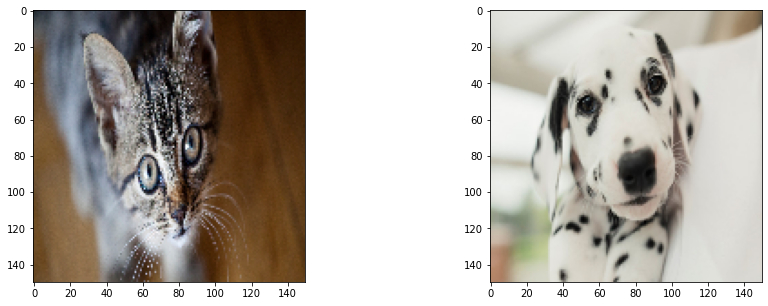

In [10]:
plt.figure(figsize=(15,5))
for i in range(len(train_data)):
    plt.subplot(1, 2, i+1)
    plt.imshow(train_data[i])

[Problem 1] Learning classification with self-made dataset

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers

In [20]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [25]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            